In [9]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Load the Student Performance Data Set
Count the Number of Rows = 25000, Check for Empty Cells - there are none


In [10]:
# Importing necessary libraries
import pandas as pd
file_path = '/content/drive/MyDrive/Colab Notebooks/DataScience102_Project/Student_Performance.csv'
# Load the dataset
data = pd.read_csv(file_path)

# Count the total number of rows in the dataset
total_rows = data.shape[0]

print(f'Total number of rows: {total_rows}\n\n')

#remove duplicate rows
data = data.drop_duplicates()
print('The total number of rows after removing duplicate rows is ', data.shape[0])



Total number of rows: 25000


The total number of rows after removing duplicate rows is  15000


##Linear Regression Test for attendance_percentage versus overall_score

In [16]:
# Importing necessary libraries
import pandas as pd
import random
import numpy as np
from plotnine import ggplot, aes, geom_histogram, ggtitle, labs, geom_vline
from scipy.stats import pearsonr

# Extracting GPA and AvgCourseDifficulty
attendance = data['attendance_percentage']
score = data['overall_score']

# Calculating the Pearson correlation coefficient and p-value
correlation_coefficient, correlation_p = pearsonr(attendance, score)

# Output the results
print('Observed correlation coefficient:')
print(correlation_coefficient)

Observed correlation coefficient:
0.28847322776538425


###Perform Simulation Based Hypothesis Test

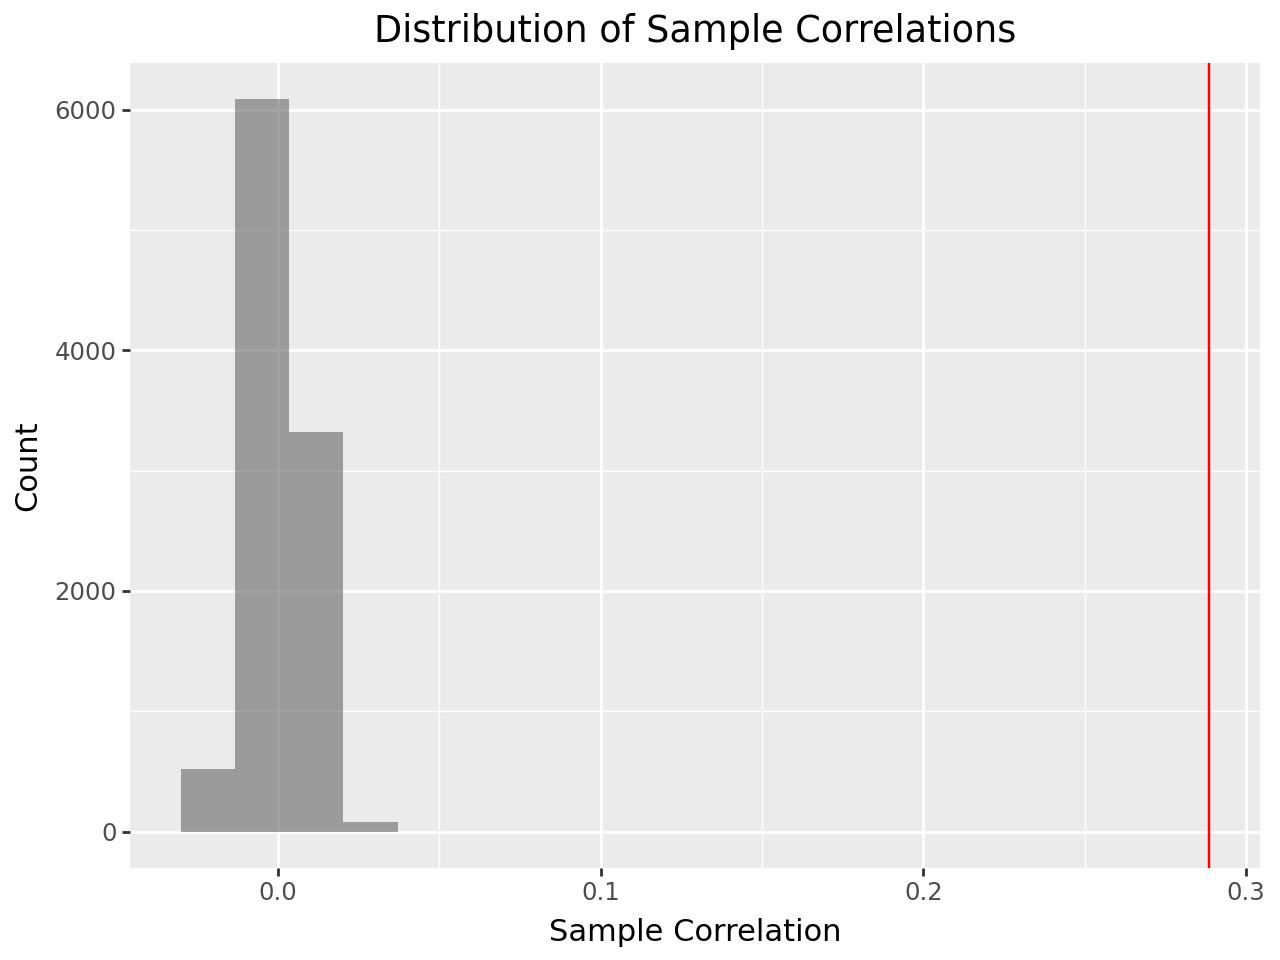

In [17]:
# Peform simulation-based hypothesis test

# Create dataframe to store simulations in
num_sim = 10000
data_sim = pd.DataFrame({
  'correlation' : [0.0]*num_sim,
})

null_value = 0

# Perform simulations
for i in np.arange(num_sim):
    correlation_sim, correlation_p = pearsonr(attendance, random.sample(sorted(score), k = len(score)))

    data_sim.loc[i, 'correlation'] = correlation_sim

# Plot simulations
(ggplot(data_sim, aes(x = 'correlation')) +
  geom_histogram(alpha = .55, bins = 20, boundary = correlation_coefficient) +
  geom_vline(xintercept = correlation_coefficient, color = 'red') +
  labs(
      x = 'Sample Correlation',
      y = 'Count'
  ) +
  ggtitle('Distribution of Sample Correlations')
)

In [15]:
# Compute and print p-value
print('P-value:')
print(sum(data_sim['correlation'] > correlation_coefficient)/num_sim)

P-value:
0.0


##Linear Regression Test for study_hours versus overall_score

In [18]:
# Importing necessary libraries
import pandas as pd
import random
import numpy as np
from plotnine import ggplot, aes, geom_histogram, ggtitle, labs, geom_vline
from scipy.stats import pearsonr

# Extracting GPA and AvgCourseDifficulty
studytime = data['study_hours']
score = data['overall_score']

# Calculating the Pearson correlation coefficient and p-value
correlation_coefficient, correlation_p = pearsonr(studytime, score)

# Output the results
print('Observed correlation coefficient:')
print(correlation_coefficient)

Observed correlation coefficient:
0.9058848411126499


###Perform Simulation Based Hypothesis Test

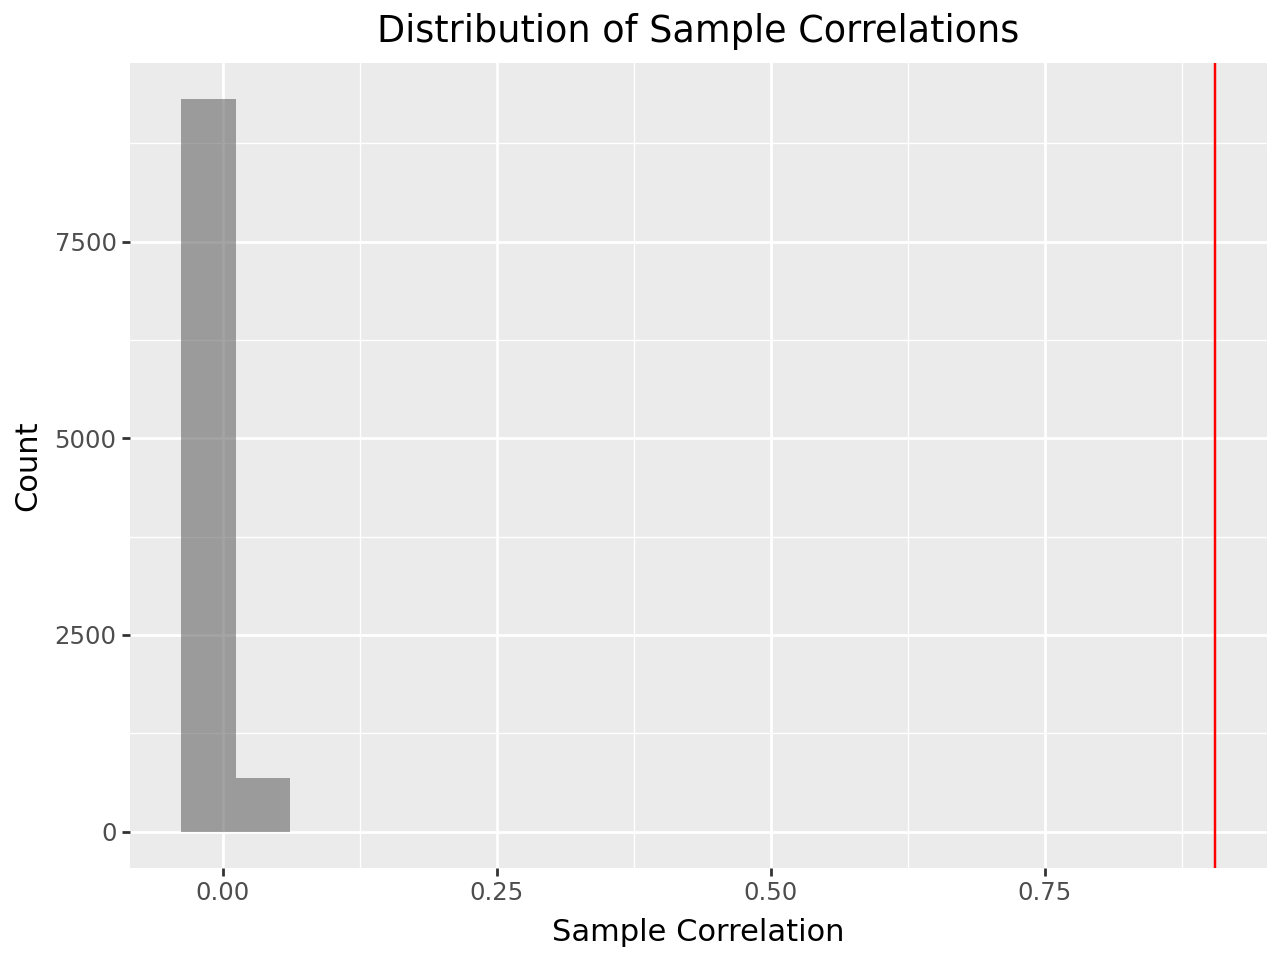

In [19]:
# Peform simulation-based hypothesis test

# Create dataframe to store simulations in
num_sim = 10000
data_sim = pd.DataFrame({
  'correlation' : [0.0]*num_sim,
})

null_value = 0

# Perform simulations
for i in np.arange(num_sim):
    correlation_sim, correlation_p = pearsonr(studytime, random.sample(sorted(score), k = len(score)))

    data_sim.loc[i, 'correlation'] = correlation_sim

# Plot simulations
(ggplot(data_sim, aes(x = 'correlation')) +
  geom_histogram(alpha = .55, bins = 20, boundary = correlation_coefficient) +
  geom_vline(xintercept = correlation_coefficient, color = 'red') +
  labs(
      x = 'Sample Correlation',
      y = 'Count'
  ) +
  ggtitle('Distribution of Sample Correlations')
)

In [ ]:
# Compute and print p-value
print('P-value:')
print(sum(data_sim['correlation'] > correlation_coefficient)/num_sim)

P-value:
0.0


In [14]:
from google.colab import drive
drive.flush_and_unmount()